# Example No 2 : DNN model by Keras for handwritten digit recognition dataset 

### What is the new we will learn in this example ?
- We will use the same dataset stored in Keras itself for handwritten digit recognition, **MNIST dataset**. 
- However, in this example we will see the effect of increasing the number of the hidden layers (# HL) when we build our model. 
- As a result, we will make scale, and increase the # HL

### What are the basic steps to build our NN model ?
> The same life cycle for any NN model as we mentioned in the previous tutorial. 
1. Load Data
2. Scaling data 
3. Define Keras Model
4. Compile Keras Model
5. Fit Keras Model
6. Evaluate Keras Model
7. Make Predictions

### 1. Load Data
> We will divide our data into training and testing sets for the purpose of building our model.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

> Let's see how the data elements looks like before and after the normalization to realize exactly what it is actually do. 

* **Data Before Normalization** : The matrix of the first element in the train data before the normalization (The numbers between 0 and 255).

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

- And here, lets see the image itself !! 

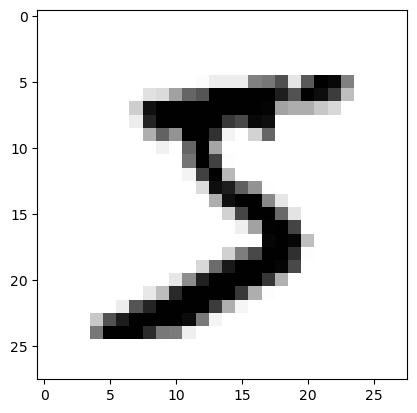

5


In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(y_train[0])    

### 2. Scaling data 


> Normalization our data by normalization function!

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

> **Important Notes**: 
- The function normalized the training, and the testing data along axis 1; normalizing each row independently. 
- We chose row based normalization, as each row is a new element in our data  

* **Data After Normalization** : The matrix of the first element in the train data after the normalization (the numbers between 0 and 1) 

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

> We can also see the image itself !!
    
* The image became more blurred because the scaling range of 0 to 1 is different from the original range of 0 to 255, but it was still recognized as the number 5. 


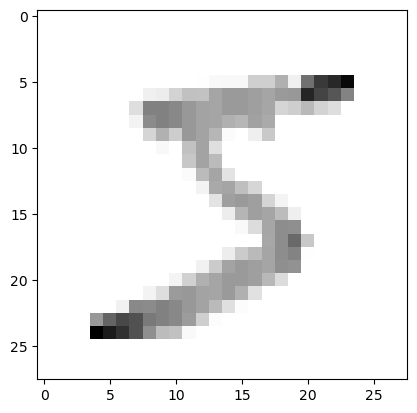

In [9]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### 3. Define Keras Model
### 4. Compile Keras Model
### 5. Fit Keras Model
> We will added 2 more HL from 512, 256 of neurons to see if this make difference 

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6632 - accuracy: 0.8207
Epoch 2/10
60/60 [==============================] - 1s 8ms/step - loss: 0.2104 - accuracy: 0.9370
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1434 - accuracy: 0.9572
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1052 - accuracy: 0.9688
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0779 - accuracy: 0.9773
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0628 - accuracy: 0.9811
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.0532 - accuracy: 0.9834
Epoch 8/10
60/60 [==============================] - 1s 8ms/step - loss: 0.0417 - accuracy: 0.9875
Epoch 9/10
60/60 [==============================] - 1s 12ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0243 - accuracy: 0.9929


### 6. Evaluate Keras Model


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('The accuracy of our model on test dataset : %.2f' % (val_acc*100))
print('The loss of our model on test dataset : %.2f' % (val_loss*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9757
The accuracy of our model on test dataset : 97.57
The loss of our model on test dataset : 8.05


### 7. Make Predictions

> Executing the prediction function once over the entire dataset.

In [14]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 822us/step


> Let's see some cases and compare! you try any image number here as you want

The model predict the image as it is number :  7
And, the real image as follows 


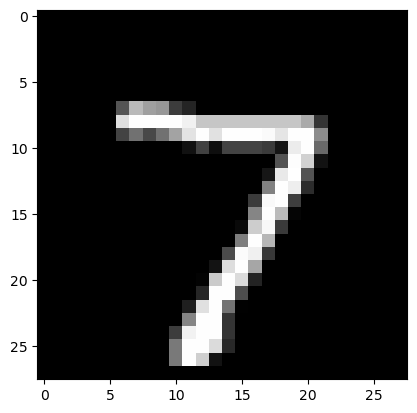

In [19]:
image_no = 0 # you can change the image number as you want

model_prediction = np.argmax(predictions[image_no])
print("The model predict the image as it is number : ", model_prediction)
print("And, the real image as follows ")
plt.imshow(x_test[image_no], cmap='gray');

&nbsp;

### For Keras basic tools & other examples
--------------------------------------
[Keras Basic Tools for DNN](../1_Keras_BasicTools_DNN.ipynb)

[Case Study No 1](Keras_CaseStudy_no1.ipynb) : To understand how to apply rescaling to data.

[Case Study No 3](Keras_CaseStudy_no3.ipynb) : For image classification tasks involving fashion items, a challenging dataset is employed. 

[Case Study No 4](Keras_CaseStudy_no4.ipynb) : Utilizing Keras to construct a DNN for a regression model allows for the observation of early stopping in action.

[Case Study No 5](Keras_CaseStudy_no5.ipynb) : Dogs & Cats classifications to assess whether DNN  can effectively handle the image data or not! 

&nbsp;

### Refrences
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem?tab=repositories"> Hesham Asem GitHub for ML tools. </a>